In [12]:
#Importing relevant libraries
import numpy as np
import pandas as pd
import torch
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

import random
import os
import re
import json


In [2]:
with open('/TVD/BLOOM/uncertainty_results/TVD_Bloom.json') as json_file:
    tvd_bloom = json.load(json_file)

In [3]:
with open('/TVD/ChatGPT/uncertainty_results/TVD_chatgpt.json') as json_file:
    tvd_chatgpt = json.load(json_file)

In [4]:
with open('/TVD/GPT2_FT/uncertainty_results/TVD_GPT2_FT.json') as json_file:
    tvd_gpt2_ft = json.load(json_file)

In [5]:
with open('/TVD/GPT2_Temp/uncertainty_results/TVD_GPT2_Temp.json') as json_file:
    tvd_gpt2_temp = json.load(json_file)

In [6]:
with open('/TVD/GPT2/uncertainty_results/TVD_gpt2.json') as json_file:
    tvd_gpt2 = json.load(json_file)

In [8]:
with open('/TVD/Oracle/uncertainty_results/TVD_oracle.json') as json_file:
    tvd_oracle = json.load(json_file)

In [9]:
tvd_bloom_human = tvd_bloom['tvd_bloom_human']
tvd_chatgpt_human_unbiased = tvd_chatgpt['temp_1']['tvd_chatgpt_human']
tvd_chatgpt_human_diverse = tvd_chatgpt['diverse']['tvd_chatgpt_human']
tvd_gpt2_ft_human = tvd_gpt2_ft['tvd_gpt2_human_fine_tuned']
tvd_gpt2_temp_human = tvd_gpt2_temp['tvd_bloom_human']
tvd_oracle2_oracle1 = tvd_oracle['tvd_oracle2_oracle1']
tvd_gpt2_human = tvd_gpt2['tvd_gpt2_human']

/home/eilia/.venv/lib64/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch-local/eilia/ipykernel_104403/3547670555.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(subset['TVD'], label=f'Name {hue_level}', linestyle=line_styles[i], clip=(0,1), fill=True, palette = 'crest', alpha = 0.2, linewidth = 3)
/home/eilia/.venv/lib64/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/eilia/.venv/lib64/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dty

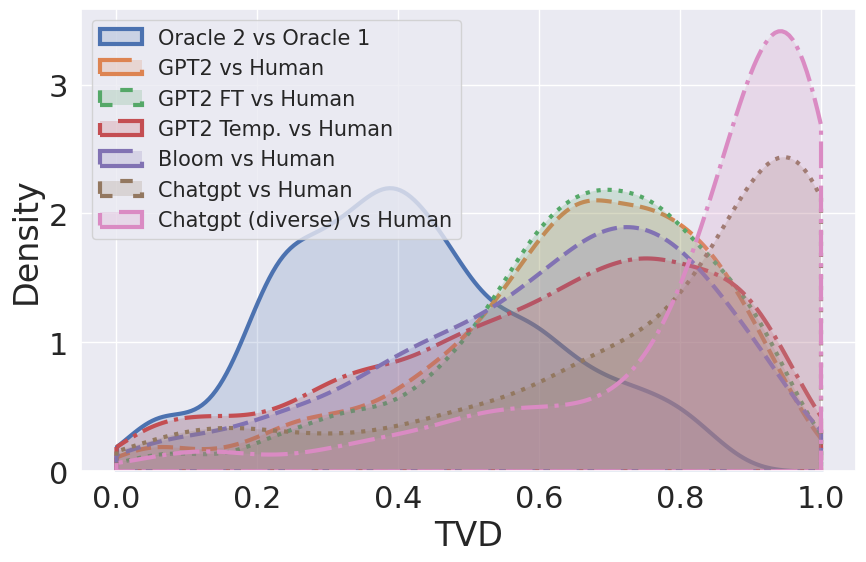

In [13]:
name_oracle2_oracle1 = ['Oracle 2 vs Oracle 1']* len(tvd_oracle2_oracle1)
name_gpt2_human = ['GPT2 vs Human']* len(tvd_gpt2_human)
name_gpt2_ft_human = ['GPT2 FT vs Human'] * len(tvd_gpt2_ft_human)
name_gpt2_temp_human = ['GPT2 Temp. vs Human'] * len(tvd_gpt2_temp_human)
name_bloom_human = ['Bloom vs Human'] * len(tvd_bloom_human)
name_chatgpt_human_unbiased = ['Chatgpt vs Human'] * len(tvd_chatgpt_human_unbiased)
name_chatgpt_human_diverse = ['Chatgpt (diverse) vs Human'] * len(tvd_chatgpt_human_diverse)

names = [name_oracle2_oracle1, name_gpt2_human, name_gpt2_ft_human, name_gpt2_temp_human, name_bloom_human, name_chatgpt_human_unbiased, name_chatgpt_human_diverse]
tvd = [tvd_oracle2_oracle1, tvd_gpt2_human, tvd_gpt2_ft_human, tvd_gpt2_temp_human, tvd_bloom_human, tvd_chatgpt_human_unbiased, tvd_chatgpt_human_diverse]

# names = [ name_oracle2_oracle1, name_chatgpt_human_diverse]
# tvd = [ tvd_oracle2_oracle1, tvd_chatgpt_human_diverse]

names = [item for row in names for item in row]
tvd = [item for row in tvd for item in row]

dict = {'Name': names, 'TVD': tvd}   
df = pd.DataFrame(dict)

sns.set(rc={'figure.figsize':(10,6)})
sns.set(font_scale=2)
line_styles = ['-', '--', ':', 'dashdot', '--', ':', 'dashdot']

# Loop through unique hue levels and create separate kdeplot for each
for i, hue_level in enumerate(df['Name'].unique()):
    subset = df[df['Name'] == hue_level]
    sns.kdeplot(subset['TVD'], label=f'Name {hue_level}', linestyle=line_styles[i], clip=(0,1), fill=True, palette = 'crest', alpha = 0.2, linewidth = 3)

plt.legend(labels=['Oracle 2 vs Oracle 1', 'GPT2 vs Human', 'GPT2 FT vs Human', 'GPT2 Temp. vs Human','Bloom vs Human', 'Chatgpt vs Human', 'Chatgpt (diverse) vs Human'], loc='upper left', fontsize="15")
plt.savefig('TVD_all_models_plot.pdf', format="pdf",bbox_inches='tight')